In [1]:
# importing libreries
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

main= pd.read_excel("gdrive/My Drive/mL/SPI3.xlsx")
print(main.shape)

# read the excel file
df = main
df.head()


Mounted at /content/gdrive
Mounted at /content/gdrive
(14608, 3)


,date,rain,SPI3
0,1981-01-03,0,1.227302
1,1981-01-04,0,1.227302
2,1981-01-05,0,1.227302
3,1981-01-06,0,1.227302
4,1981-01-07,0,1.227302


In [3]:
print(df.describe())

               rain          SPI3
count  14608.000000  14580.000000
mean      14.022248      1.037852
std       29.682199      1.287118
min        0.000000     -1.486690
25%        0.000000      0.272809
50%        0.000000      0.963700
75%       16.000000      1.530850
max      494.000000      7.916521


In [4]:
# Sort the Date
df1 = df.sort_values('date')
#print the sorted values
print(df.head(100))
#check any missing values
df.isnull().sum()

         date  rain      SPI3
0  1981-01-03     0  1.227302
1  1981-01-04     0  1.227302
2  1981-01-05     0  1.227302
3  1981-01-06     0  1.227302
4  1981-01-07     0  1.227302
..        ...   ...       ...
95 1981-04-08     0  0.272809
96 1981-04-09     0  0.272809
97 1981-04-10     0  0.272809
98 1981-04-11     0  0.272809
99 1981-04-12     0  0.272809

[100 rows x 3 columns]


date     0
rain     0
SPI3    28
dtype: int64

In [5]:
dfs = df.set_index('date')
dfs.index

DatetimeIndex(['1981-01-03', '1981-01-04', '1981-01-05', '1981-01-06',
               '1981-01-07', '1981-01-08', '1981-01-09', '1981-01-10',
               '1981-01-11', '1981-01-12',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=14608, freq=None)

In [6]:
# grouping values according to date
df.groupby('date')['SPI3'].sum().reset_index()

# min and max values of date
print(df['date'].min())
print(df['date'].max())

1981-01-03 00:00:00
2020-12-31 00:00:00


In [7]:
# average the daily humidity value for each month
# use start of each month as the timestamp
y = dfs['SPI3'].resample('MS').mean()
y['2000':]

date
2000-01-01    1.227302
2000-02-01    0.965415
2000-03-01    0.849244
2000-04-01    0.624252
2000-05-01    0.433035
                ...   
2020-08-01    0.650891
2020-09-01    2.541775
2020-10-01    1.271913
2020-11-01    1.091620
2020-12-01    1.530850
Freq: MS, Name: SPI3, Length: 252, dtype: float64

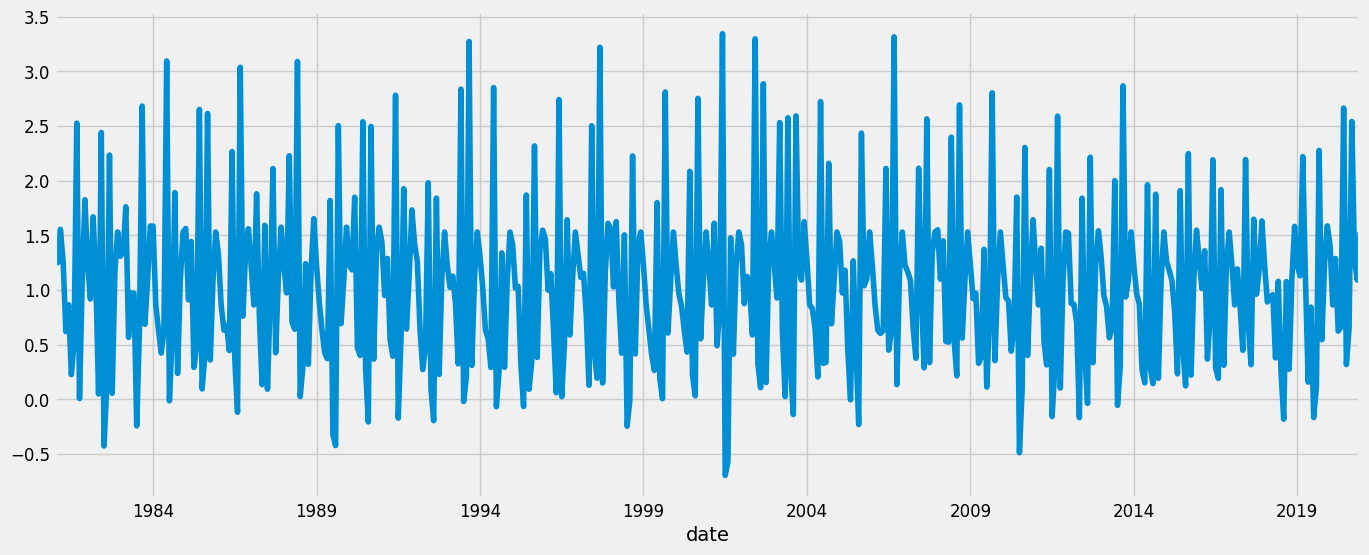

In [8]:
y.plot(figsize = (15, 6))
plt.show()

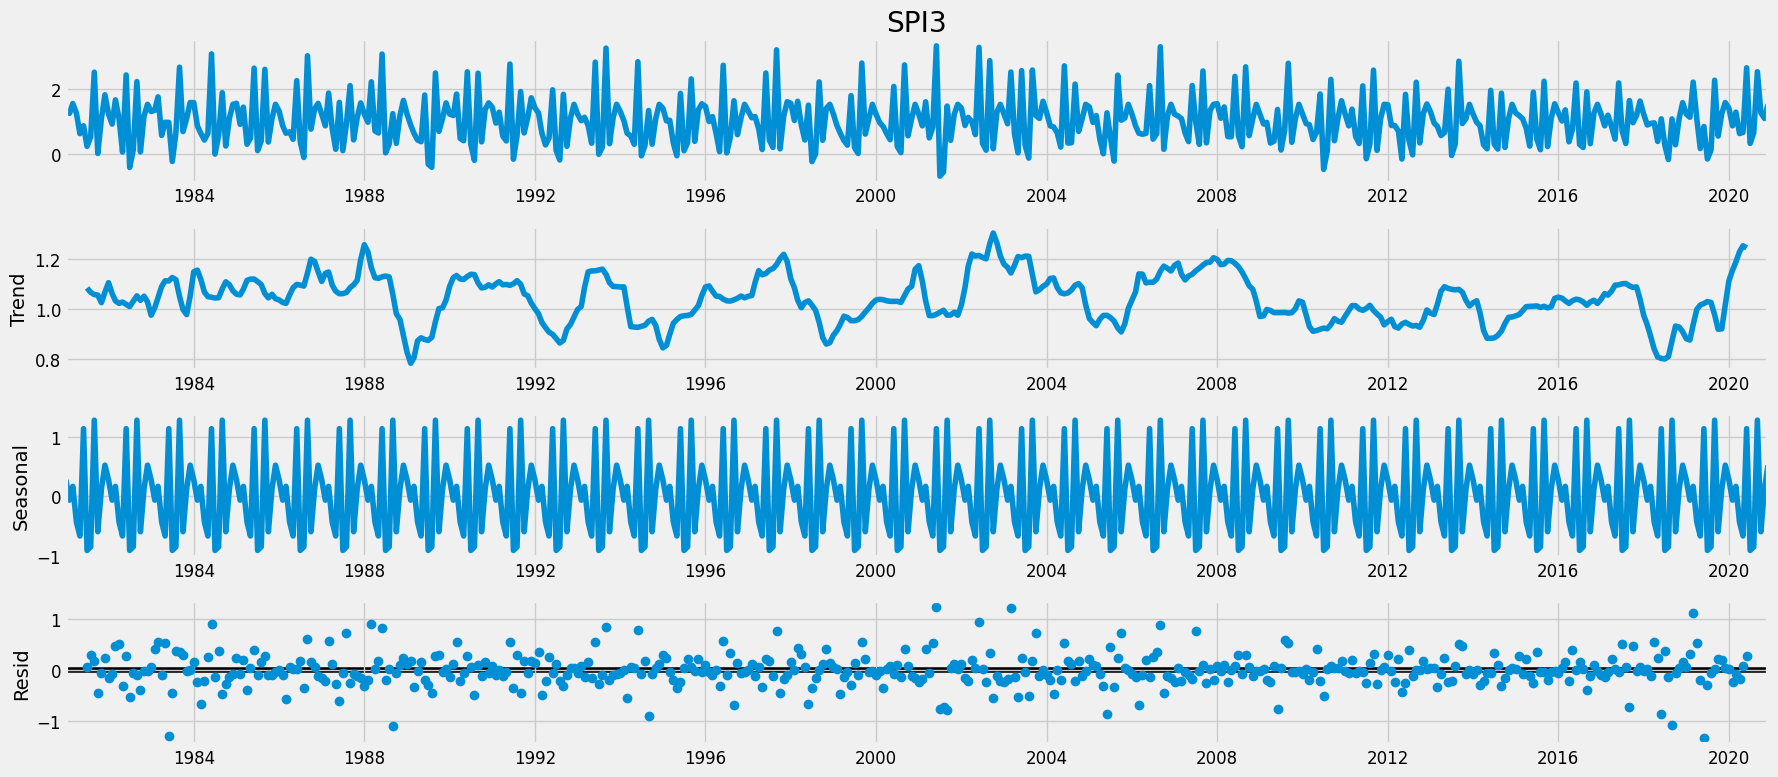

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

In [10]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False)
            result = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1615.6691499795988
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1253.5839301446447
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:652.2738294114116
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:377.0049095999052
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:679.0580526479109
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:418.8585319829981
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:501.1716390347265
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:378.5810153328711
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1507.6053184954535
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1184.81278893524
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:651.7175074706665
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:376.1174373811217
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:675.9770903896149
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:416.43347121709576
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:499.4590408143515
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:377.4870018434589
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1584.7460202612328
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1302.6069978128596
ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:413.5540258951563
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:510.06580057990425
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:391.00707758533946
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1461.2957061861903
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1152.8976652640426
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:651.5484536425906
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:376.1991401002338
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:675.267620624167
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:416.4376117261625
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:499.20473488242874
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:377.5916175242762


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1127.5871308680535


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:903.4036029862023
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:653.4529861325907
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:378.09596155095875


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:656.6723166245129


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:418.67658340397105
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:500.96569199717965
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:379.4507012792614
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1424.3071719095465
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1162.8241777656654
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:820.947539409136
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:558.8965510024511
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:820.7568978679064
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:593.7684483511468
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:665.4729048583297
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:560.552797176044
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1068.195712225755
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:880.1586260381314
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:659.1252902838078
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:388.56344251414214
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:638.1132010321871


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:413.91340058426033
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:507.92414084438536
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:389.82652273960554


In [12]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[0])


                                      SARIMAX Results                                      
Dep. Variable:                                SPI3   No. Observations:                  480
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -249.962
Date:                             Sat, 22 Jul 2023   AIC                            507.925
Time:                                     20:15:15   BIC                            524.510
Sample:                                 01-01-1981   HQIC                           514.452
                                      - 12-01-2020                                         
Covariance Type:                               opg                                         


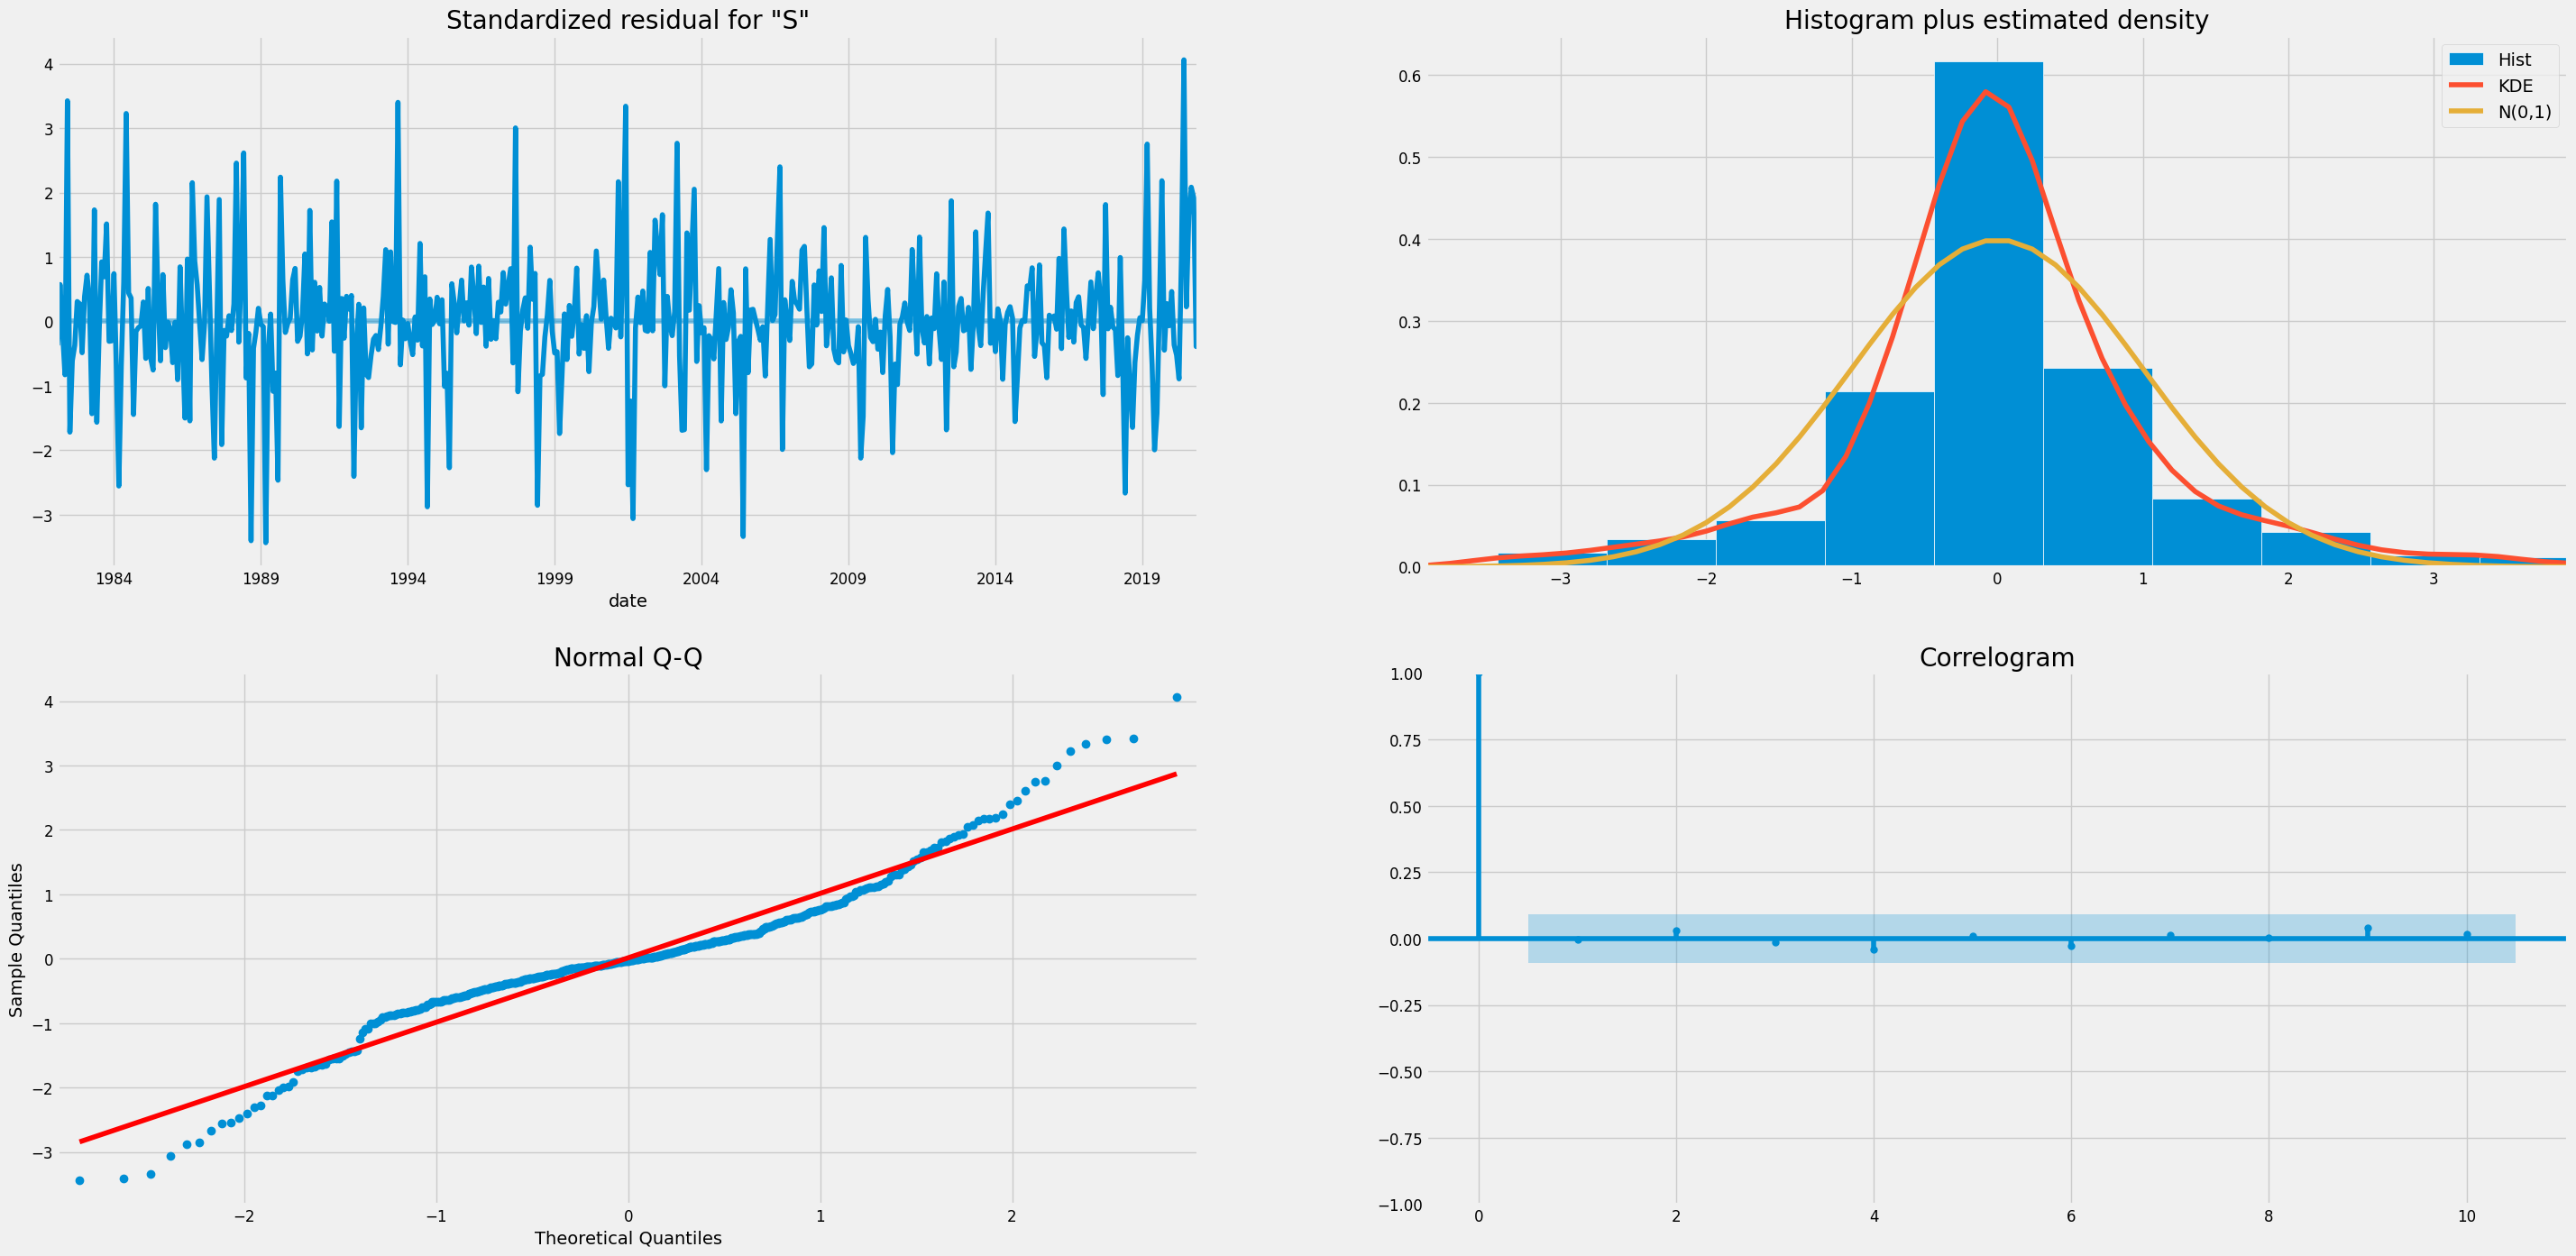

In [13]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (32, 16))
plt.show()

In [14]:
prediction = result.get_prediction(start = pd.to_datetime('2015-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower SPI3,upper SPI3
date,,
2015-01-01,0.461185,2.064230
2015-02-01,0.152062,1.755102
2015-03-01,0.073527,1.676562
2015-04-01,-0.352635,1.250394
2015-05-01,-0.344512,1.258512
...,...,...
2020-08-01,-0.825481,0.777261
2020-09-01,0.888557,2.491294
2020-10-01,-0.313541,1.289193


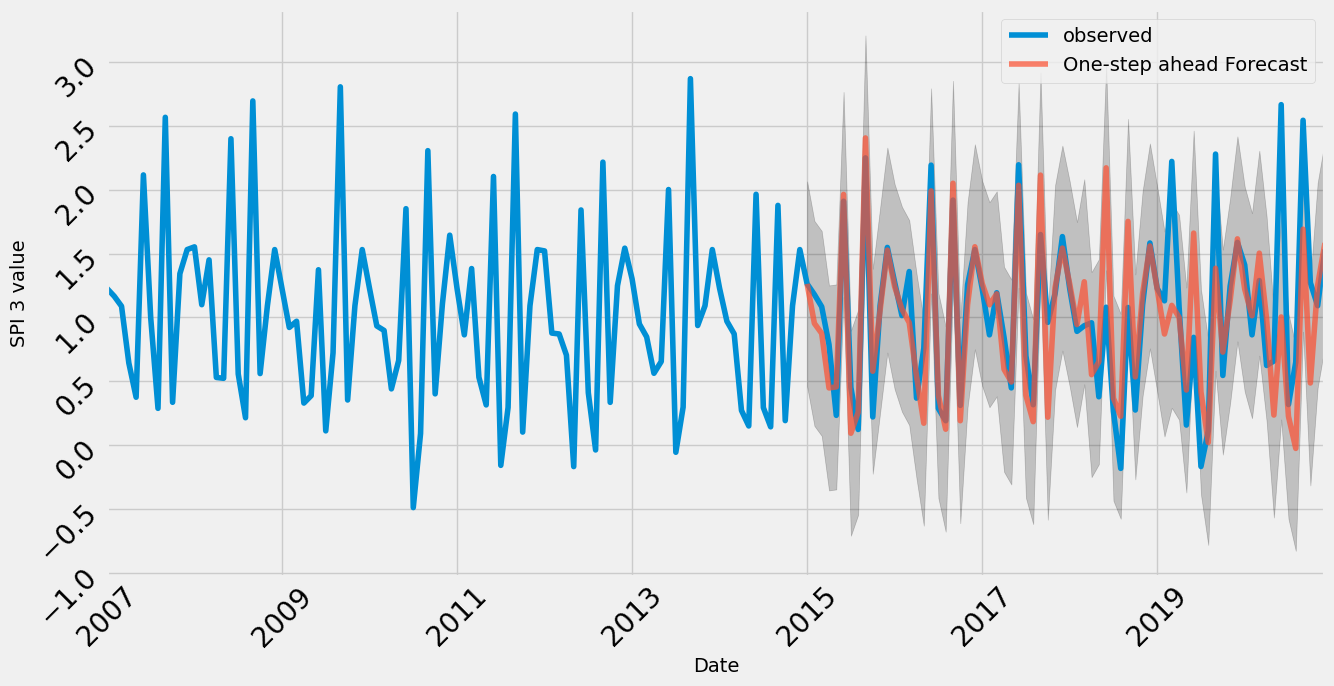

<Figure size 1800x800 with 0 Axes>

In [15]:
#Visualize the forecasting
ax = y['2007':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('SPI 3 value')
ax.tick_params(axis='both', which='major', labelsize=20, rotation=45)
ax.tick_params(axis='both', which='minor', labelsize=20, rotation=45)
plt.legend()
plt.show()
plt.savefig('gdrive/My Drive/mL/SPI 3 osa.png')

In [16]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2015-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 0.18
The Root Mean Squared Error of our forecasts is 0.42


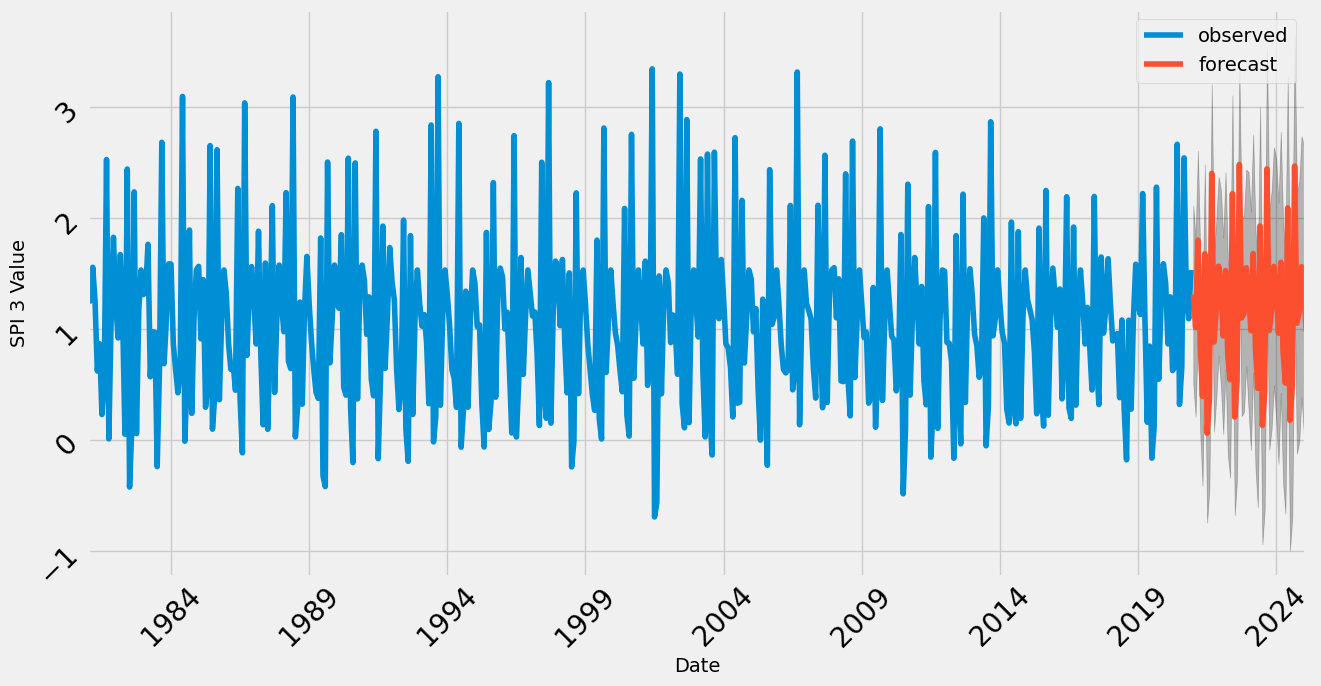

<Figure size 1800x800 with 0 Axes>

In [17]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 50)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('SPI 3 Value')
ax.tick_params(axis='both', which='major', labelsize=20, rotation=45)
ax.tick_params(axis='both', which='minor', labelsize=20, rotation=45)

plt.legend()
plt.show()
plt.savefig('gdrive/My Drive/mL/SPI 3 fr.png')

Text(0.5, 1.0, 'Original vs Windowed mean vs Windowed std')

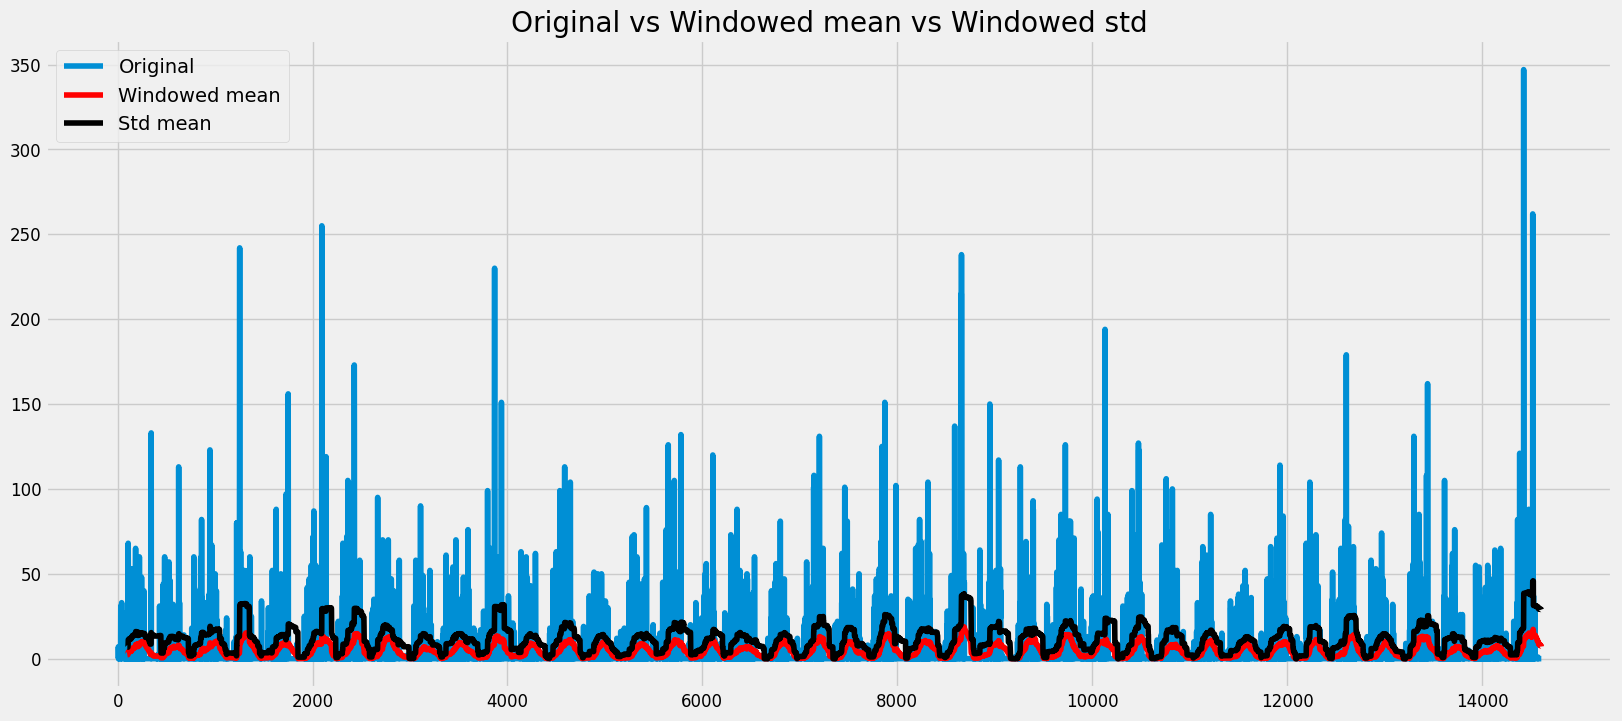

In [18]:
df_new = pd.read_excel("gdrive/My Drive/mL/jesonline.xlsx")
df_new.rainfall.plot(label='Original')
df_new.rainfall.rolling(window=100).mean().plot(
    color='red', label='Windowed mean')
df_new.rainfall.rolling(window=100).std().plot(
    color='black', label='Std mean')
plt.legend()
plt.title('Original vs Windowed mean vs Windowed std')

In [20]:
predicted_values = prediction.predicted_mean

# Confidence Intervals
prediction_ci['predicted_mean'] = predicted_values

# Save the prediction and confidence intervals to a DataFrame
forecast_df = prediction_ci[['predicted_mean', 'lower SPI3', 'upper SPI3']]

# Combine the observed and predicted data into a single DataFrame
combined_df = pd.DataFrame({'Date': y.index, 'Observed_SPI1': actual_spi1, 'Predicted_SPI1': prediction.predicted_mean})

# Save the combined DataFrame to a CSV file
combined_df.to_csv("gdrive/My Drive/mL/SPI1_Observed_Predicted.csv", index=False)

NameError: ignored